## July 5th, 2016
I few notes on the sensitivity of our $1/k^4$ tails to residual fluctuations of the center of our momentum distribution.  

We hav seen that the edge of the condensate exhibits a smoothness, which are consistent with an error in the re-centering on the order of 15%.  Here I will investigate how this might affect the high-momentum wings.  I don't expect anything... but I'm running out of ideas.

For a single shot we have the following 1D density distribution:

$$ n(k,\delta k)= \frac{1}{(k+\delta k)^4}$$

where $\delta k$ represents the error in the centering for shot $i$.

In our case, we take the average over several hundred shots.  I'll assume that $\delta k$ has gaussian statistics with standard deviation $\sigma$,

$$f(\delta k)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\delta k^2}{2\sigma^2}}$$

The average density is then

$$n(k)=\int d\delta\,\,  f(\delta) n(k,\delta)$$

Let's calculate this numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

In [2]:
# distribution of errors
sigma=1e6*0.15 # 15% of the BEC TF size [1/m]
# smooth gaussian distribution
dk=np.arange(-5*sigma,5*sigma,0.2e4) 
f=1/np.sqrt(2*pi*sigma**2)*np.exp(-dk**2/2/sigma**2)
# random gaussian distribution
dkRand=np.random.normal(loc=0.0, scale=sigma,size=[len(dk),1])

In [3]:
# setup centered momentum distribution
k=np.arange(1.001e5,10e6,1e3)
n0=1./k**4
# setp un-centered momentum distribution
nbar=np.zeros(len(k))
nbar2=np.zeros(len(k))
for i in range(0,len(dk)):    
    nbar+=f[i]/(k+dk[i])**4*(dk[1]-dk[0]) # fulling from a     
    nbar2+=1/(k+dkRand[i])**4/len(dk)

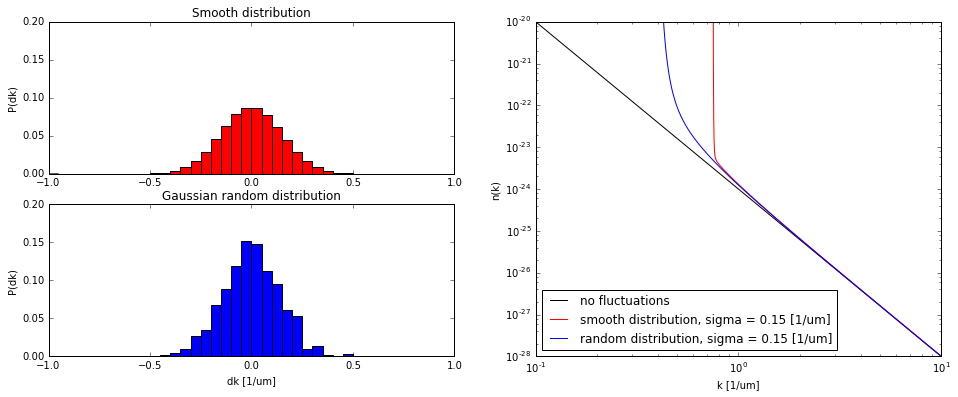

In [4]:
# plot stuff
fig=plt.figure(figsize=(16,6))

# plot smooth distribution
bins=np.arange(-1,1.1,0.05)
plt.subplot(221)
plt.hist(dk*1e-6, bins=bins,weights=1e6*f/len(dk),color='red')
plt.ylabel('P(dk)')
plt.title('Smooth distribution')
plt.xlim([-1,1]), plt.ylim([0,0.2])

# plot random distribution
plt.subplot(223)
weights = np.ones_like(dkRand*1e-6)/float(len(dkRand))
plt.hist(dkRand*1e-6,bins=bins, weights=weights,color='blue')
plt.xlabel('dk [1/um]'), plt.ylabel('P(dk)')
plt.title('Gaussian random distribution')
plt.xlim([-1,1]), plt.ylim([0,0.2])

# plot momentum distributions
plt.subplot(122)
plt.loglog(k*1e-6,n0,color='black',label='no fluctuations')
plt.loglog(k*1e-6,nbar,color='red',label='smooth distribution, sigma = {} [1/um]'.format(sigma*1e-6))
plt.loglog(k*1e-6,nbar2,color='blue',label='random distribution, sigma = {} [1/um]'.format(sigma*1e-6))
plt.xlim([0.1,10]), plt.ylim([1e-28,1e-20])
plt.xlabel('k [1/um]'), plt.ylabel('n(k)')
plt.legend(loc=3)

Above I plot various momentum distributions.  

Firstly, the ideal $1/k^4$ distribution in the absence of fluctuaitons.

Secondly, $n(k)$ averaged over a guassian distribution of $\delta k$s with $\sigma=$ 15% of the TF width ($K_{TF}\sim 1$ $\mu^{-1} m$).  

Lastly, $n(k)$ from a discrete sum over random samples of $\delta k_i$ from a gaussian distribution.  

Aside from the sharp jump at low momentum for the case of the smooth distribution, this exactly the behavior I expected.  The tails at high momentum are essentially unchanged.